In [49]:
# Enter your name here
# Matthew Jagen

# Assignment 0: Data Prep

One of the most important (and usually time consuming!) steps in the data science process is data pre-processing. 

Data prep includes:
* Data exploration  
* Data cleaning
* Feature engineering

In this assignment, you will do a little of each of these things. 

## Part 1: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [50]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt
import math

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'1.1.5'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [51]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [52]:
# your code goes here
count = 0
for val in leaf_data["eccentricity"]:
    if math.isnan(val):
        count += 1
print("The eccentricity column is missing {} values".format(count))

The eccentricity column is missing 5 values


Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [53]:
# your code goes here

mean = leaf_data["eccentricity"].mean()

# Fill in the missing values with our calculated mean
ec_col = leaf_data.loc[:,"eccentricity"]
for i in range(len(ec_col)):
    if math.isnan(ec_col[i]):
        ec_col[i] = mean
leaf_data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Create a scatter plot between `smoothness` and `eccentricity`. Place `smoothness` on the X axis.

<AxesSubplot:xlabel='smoothness', ylabel='eccentricity'>

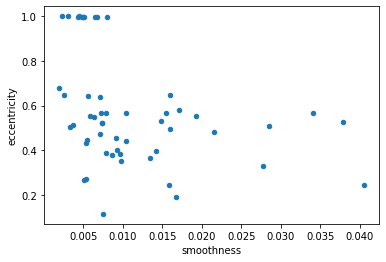

In [54]:
# your code goes here
leaf_data.plot.scatter(x='smoothness', y='eccentricity')

Q4. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

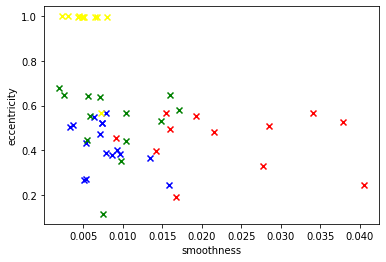

In [55]:
# your code goes here -- adapted from section 2.2 in the pandas/matplotlib tutorial ipynb

# separate the data by class labels
class1 = leaf_data[leaf_data['class'] == 1]
class2 = leaf_data[leaf_data['class'] == 2]
class3 = leaf_data[leaf_data['class'] == 3]
class4 = leaf_data[leaf_data['class'] == 4]

# plot class 1 in blue
plt.scatter(class1['smoothness'], 
           class1['eccentricity'], 
           c='blue', marker = 'x')

# plot class 2 in green
plt.scatter(class2['smoothness'], 
           class2['eccentricity'], 
           c='green', marker = 'x')

# plot class 3 in red
plt.scatter(class3['smoothness'], 
           class3['eccentricity'], 
           c='red', marker = 'x')

# plot class 4 in yellow
plt.scatter(class4['smoothness'], 
           class4['eccentricity'], 
           c='yellow', marker = 'x')

plt.xlabel('smoothness')
plt.ylabel('eccentricity')
plt.show()

Q5. Calculate the correlation coefficient between the `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [56]:
# your code goes here
print(ec_col.corr(leaf_data["smoothness"]))

# The correlation coeffecient tells us how well the two columns relate in a linear way.
# Because the coefficient calculated was negative, the general trend is that as smoothness increases, eccentricity decreases.
# The absolute value for the coeffecient calculated for these columns was relatively low at 0.35 (max is 1),
#     so there isn't a significant linear relation

-0.35441842207549984


Q6. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

<AxesSubplot:>

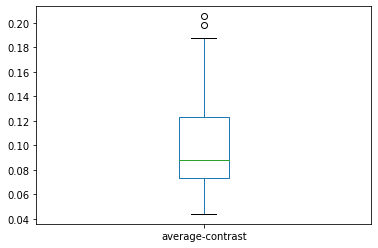

In [57]:
# your code goes here
leaf_data["average-contrast"].plot(kind='box')

Q7. Data scaling

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [58]:
import sklearn.preprocessing

# your code goes here
scaler = sklearn.preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(leaf_data.values)
scaled_df = pd.DataFrame(scaled_data, columns=leaf_data.columns)

print("Mean of scaled columns:")
print(scaled_df.mean())
print("\nStandard Deviation of scaled columns:")
print(scaled_df.std())
scaled_df.head()


Mean of scaled columns:
class                       -6.191628e-17
eccentricity                -2.183083e-16
aspect-ratio                -2.241796e-17
elongation                   2.925011e-16
solidity                     7.985066e-16
stochastic-convexity         5.444363e-16
isoperimetric-factor         1.526557e-16
maximal-indentation-depth    1.387779e-16
lobedness                    8.113168e-17
average-intensity            3.416071e-17
average-contrast            -4.782499e-16
smoothness                   8.540177e-18
third-moment                -1.110223e-16
uniformity                  -3.416071e-17
entropy                     -1.110223e-16
dtype: float64

Standard Deviation of scaled columns:
class                        1.009756
eccentricity                 1.009756
aspect-ratio                 1.009756
elongation                   1.009756
solidity                     1.009756
stochastic-convexity         1.009756
isoperimetric-factor         1.009756
maximal-indentation-depth 

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,-1.196975,0.000000,-0.531196,0.395212,-1.262773,-0.441095,-0.875478,1.116108,0.890913,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
1,1.470569,1.780646,1.447597,1.416854,0.559789,0.714453,-0.809227,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.456439,-0.533339
2,0.581388,-1.560194,-0.522047,-1.012484,0.638209,0.692846,0.299095,-0.681097,-0.674420,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
3,-1.196975,-0.189086,-0.508525,0.691019,-1.598947,-1.434686,-0.953551,1.524256,1.551250,-0.417379,-0.354676,-0.423053,-0.379852,-0.496638,-0.322750
4,0.581388,-0.978561,-0.508165,-0.922422,0.637376,0.692846,0.395487,-0.588718,-0.647312,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


Q8. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensionsare necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [59]:
import sklearn.decomposition

# your code goes here
pca = sklearn.decomposition.PCA(n_components = 0.95, svd_solver='full')
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data)

pca_df.head()

,0,1,2,3
0,-1.913295,-1.640935,-0.125938,-0.170518
1,-1.334940,3.278785,-1.267546,-0.277511
2,2.403210,-0.254869,0.533179,1.242831
3,-2.673994,-2.430999,-0.447589,-0.257778
4,4.901103,-1.195363,-1.180374,-0.053530


## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/Adult).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [63]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
print(adult_data.shape)
# show the head of the data (first 5 values)
adult_data.head()

(32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Q9. Show the distribution of the dataset with respect to the `education` column (how many people have each level of education). Choose a plot that is suitable to show this.

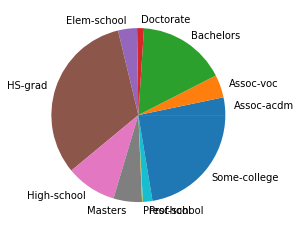

In [65]:
# your code here
groups = adult_data.groupby("education")
plt.pie(groups.size(), labels=groups.groups)
plt.show()

Q10.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` category.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [66]:
# your code here
groups = adult_data.groupby("marital-status")
print("Mean hours per week:")
print(groups["hours-per-week"].mean())
print("\nMedian hours per week:")
print(groups["hours-per-week"].median())
print("\nStandard Deviation of hours per week:")
print(groups["hours-per-week"].std())

Mean hours per week:
marital-status
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-civ-spouse       43.284856
Married-spouse-absent    39.669856
Never-married            36.939998
Separated                39.301463
Widowed                  32.979859
Name: hours-per-week, dtype: float64

Median hours per week:
marital-status
Divorced                 40
Married-AF-spouse        40
Married-civ-spouse       40
Married-spouse-absent    40
Never-married            40
Separated                40
Widowed                  40
Name: hours-per-week, dtype: int64

Standard Deviation of hours per week:
marital-status
Divorced                 10.676632
Married-AF-spouse        19.440596
Married-civ-spouse       11.905047
Married-spouse-absent    11.767374
Never-married            12.432542
Separated                10.377534
Widowed                  14.058690
Name: hours-per-week, dtype: float64


In [67]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q11. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [68]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
# your code goes here
continent_list = adult_data_copy["native-country"].map(continent_dict)
adult_data_copy.insert(13, "continent", continent_list)

adult_data_copy.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,continent,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,North-America,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,North-America,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,North-America,<=50K
3,53,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,North-America,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,North-America,<=50K


Q12. Create a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

<BarContainer object of 5 artists>

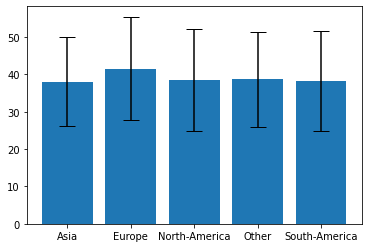

In [69]:
# your code goes here
continent_groups = adult_data_copy.groupby("continent")
continent_mean_age = continent_groups["age"].mean()
continent_std_age = continent_groups["age"].std()
plt.bar(continent_mean_age.index, continent_mean_age.values, yerr=continent_std_age.values, capsize=8)

Q13. To reduce the dimensionality of this dataset using feature selection, which attribute or attributes would you eliminate? Explain why.

In [70]:
'''Explain why here (as a comment): I would first eliminate the education attribute. It is so closely tied to education-num
and even shows less information than education-num since, for example, an education of "High-school" ranges anywhere from
an education number of 5 to 8. I also think it would be reasonable to eliminate the relationship attribute since most cases
stem from some specific combination of other attributes. Such as "husband" and "wife" always being tied to relationship
status and sex. The reason I would remove the education attribute first is because of the relationship status of "Own-child"
that cannot be inferred from other attributes.

'''

'Explain why here (as a comment): I would first eliminate the education attribute. It is so closely tied to education-num\nand even shows less information than education-num since, for example, an education of "High-school" ranges anywhere from\nan education number of 5 to 8. I also think it would be reasonable to eliminate the relationship attribute since most cases\nstem from some specific combination of other attributes. Such as "husband" and "wife" always being tied to relationship\nstatus and sex. The reason I would remove the education attribute first is because of the relationship status of "Own-child"\nthat cannot be inferred from other attributes.\n\n'